In [13]:
import pandas as pd
import sklearn as sl
import numpy as np
import seaborn as sns
import matplotlib as pl

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/Data Analyst Projects/Week 3/raw_sales_data.xlsx'
df = pd.read_excel(file_path)
df

,Customer_ID,Customer_Name,Region,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index,Churned
0,101,John Doe,North,5000,12,2000,1.2,No
1,102,Jane Smith,South,3000,8,1500,1.0,Yes
2,103,Sam Brown,East,4500,10,1800,1.1,No
3,104,Linda Johnson,West,2500,5,1000,0.9,Yes
4,105,Michael Lee,North,7000,15,2500,1.3,No
5,106,Emily Davis,South,3200,7,1400,1.0,Yes
6,107,David Wilson,East,5300,14,2300,1.2,No
7,108,Susan White,West,2900,6,1100,0.8,Yes
8,109,Chris Martin,North,6000,13,2200,1.2,No
9,110,Anna Taylor,South,3100,8,1350,0.9,Yes


In [6]:
# Finding if there is any missing values in the dataset
miss_val = df.isnull().sum()
miss_val

,0
Customer_ID,0
Customer_Name,0
Region,0
Total_Spend,0
Purchase_Frequency,0
Marketing_Spend,0
Seasonality_Index,0
Churned,0


In [11]:
#To find the outliers
from scipy import stats
#Numerical columns to find outliers
num_cols = ["Total_Spend", "Purchase_Frequency", "Marketing_Spend"]
z_scores = np.abs(stats.zscore(df[num_cols]))
print(z_scores)
outlier_rows = (z_scores > 3).any(axis=1)
outliers_zscore = df[outlier_rows]

print("Outliers detected using Z-Score Method:")
print(outliers_zscore)

    Total_Spend  Purchase_Frequency  Marketing_Spend
0      0.638042            0.800641         0.692902
1      0.841475            0.480384         0.373101
2      0.268162            0.160128         0.266501
3      1.211354            1.441153         1.439105
4      2.117558            1.761410         1.758906
5      0.693523            0.800641         0.586302
6      0.859969            1.441153         1.332504
7      0.915451            1.120897         1.225904
8      1.377800            1.120897         1.119304
9      0.767499            0.480384         0.692902
10     0.416114            0.480384         0.479702
11     1.137378            1.441153         1.332504
12     1.007921            0.800641         0.906103
13     0.619548            0.160128         0.479702
14     0.564066            0.480384         0.692902
15     1.063403            1.120897         1.119304
Outliers detected using Z-Score Method:
Empty DataFrame
Columns: [Customer_ID, Customer_Name, Regio

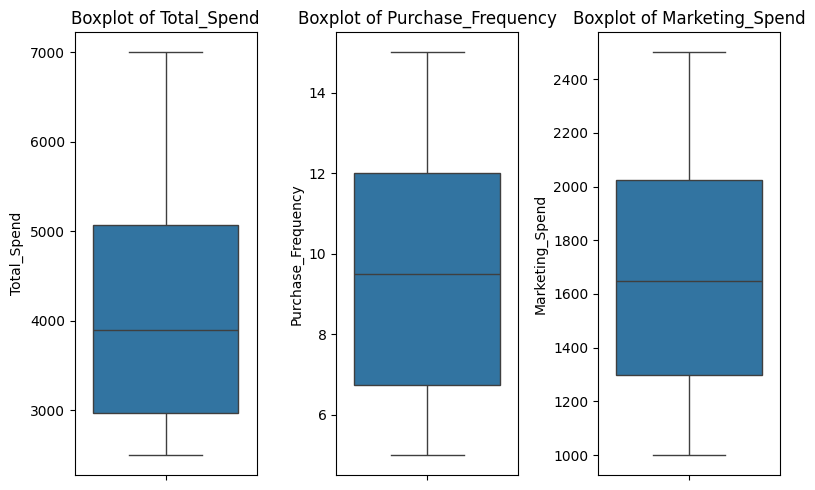

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
# Boxplots for numerical columns
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()